<a href="https://colab.research.google.com/github/CODINGHARI123/EDA/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Load Neccessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.shape

(6607, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [8]:
df.duplicated().sum()

0

In [9]:
col=['Teacher_Quality','Parental_Education_Level','Distance_from_Home']
for i in col:
  df[i]=df[i].fillna(df[i].mode()[0])
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [10]:
df.duplicated().sum()

0

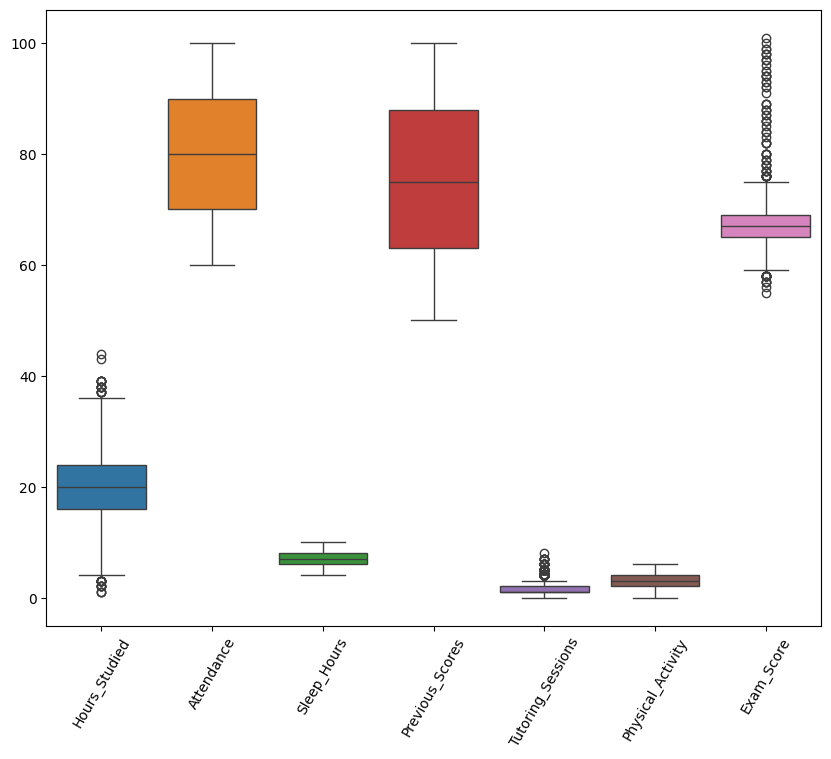

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=60)
plt.show()

### **Outlier Detection**

In [12]:
outliers=[]
def detect_outliers(data):
          for col in data.select_dtypes(include=['float64','int64']).columns:
            q1=data[col].quantile(0.25)
            q3=data[col].quantile(0.75)
            iqr=q3-q1
            lower_bound=q1-1.5*iqr
            upper_bound=q3+1.5*iqr
            for i in data[col]:
              if i<lower_bound or i>upper_bound:
                outliers.append(i)
            return outliers
outliers=detect_outliers(df)
print(outliers)

[43, 1, 38, 3, 3, 3, 2, 39, 39, 2, 2, 37, 39, 38, 38, 44, 2, 3, 3, 37, 2, 39, 39, 3, 37, 2, 3, 3, 3, 3, 1, 1, 37, 38, 39, 38, 38, 3, 37, 39, 38, 3, 37]


In [13]:
# capping and flooring
def floor_cap_outliers(data):
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Flooring and capping the outliers
        data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return data

# Apply the flooring and capping function to the dataframe
df = floor_cap_outliers(df)
print(df)


      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0              23.0          84                  Low                High   
1              19.0          64                  Low              Medium   
2              24.0          98               Medium              Medium   
3              29.0          89                  Low              Medium   
4              19.0          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602           25.0          69                 High              Medium   
6603           23.0          76                 High              Medium   
6604           20.0          90               Medium                 Low   
6605           10.0          86                 High                High   
6606           15.0          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

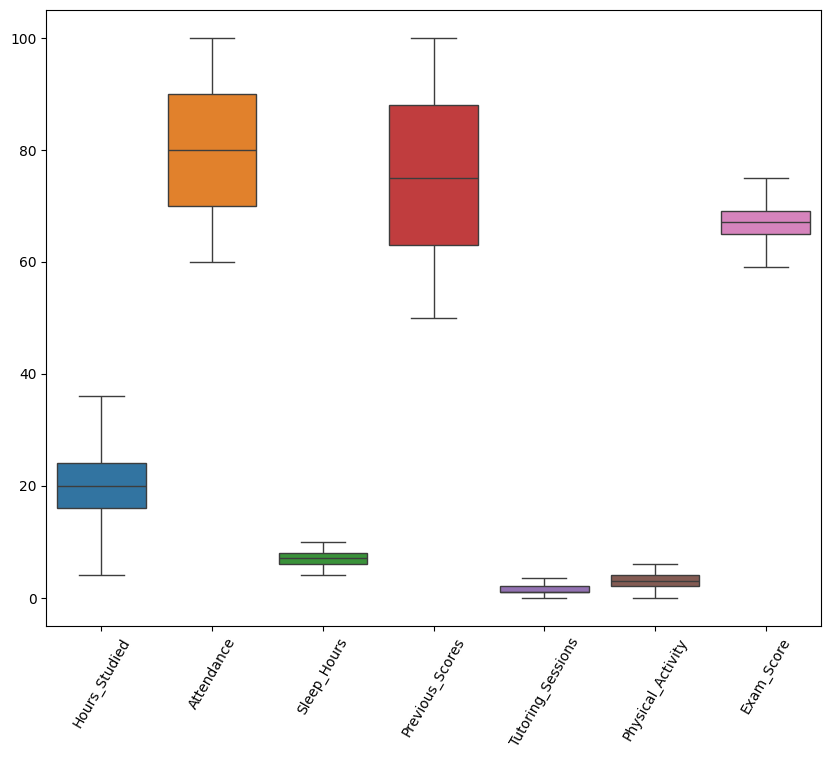

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=60)
plt.show()

### **Univariate Analysis**

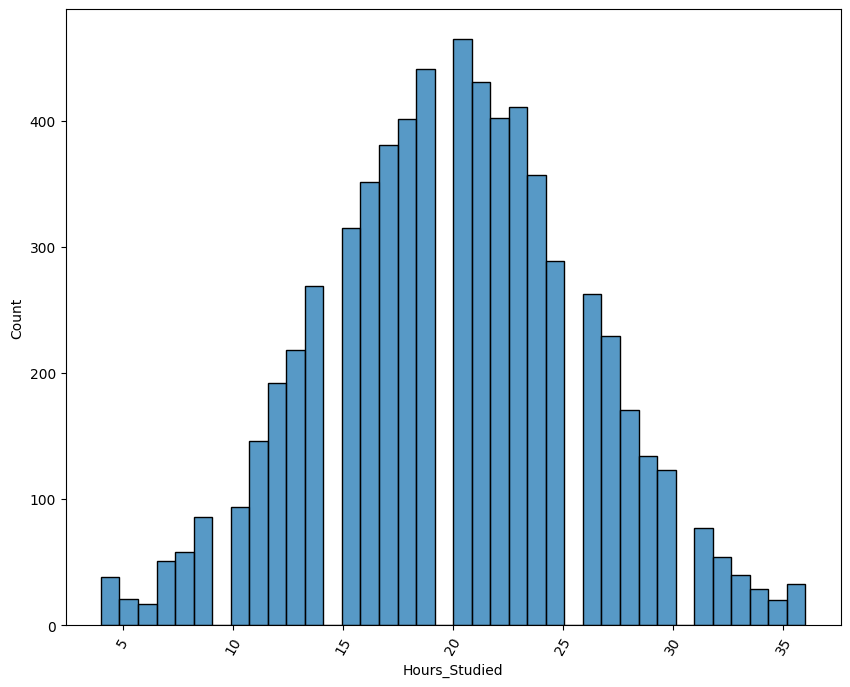

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Hours_Studied')
plt.xticks(rotation=60)
plt.show()

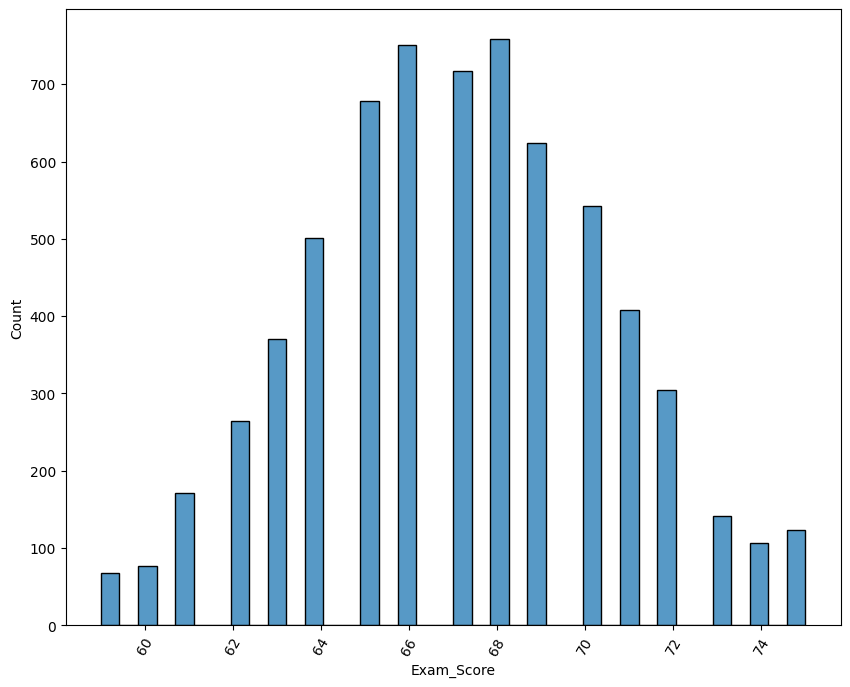

In [16]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Exam_Score')
plt.xticks(rotation=60)
plt.show()

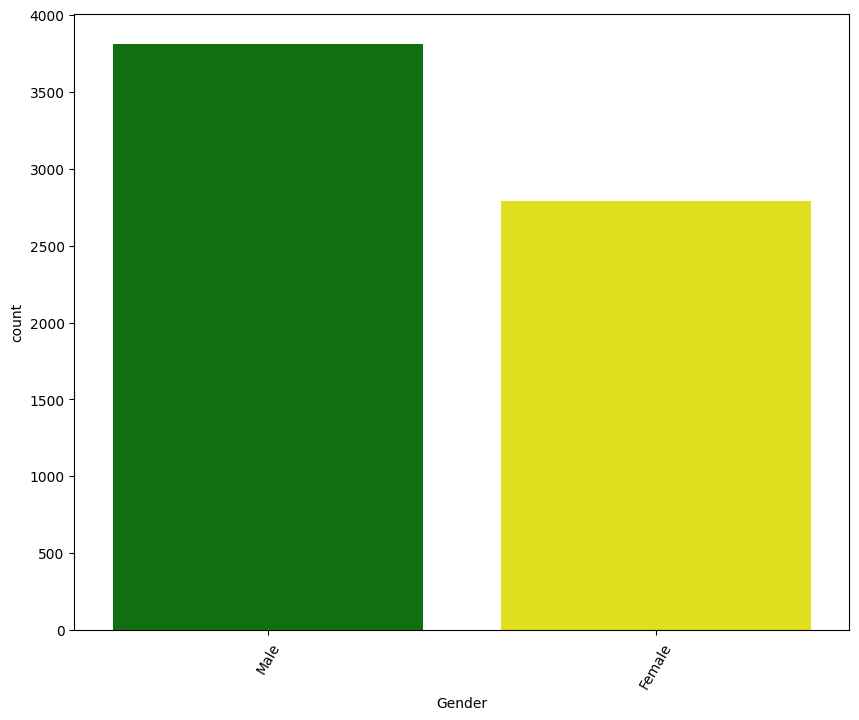

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Gender', palette={ 'Male':'green','Female': 'yellow'}) # Use palette to map colors to gender
plt.xticks(rotation=60)
plt.show()

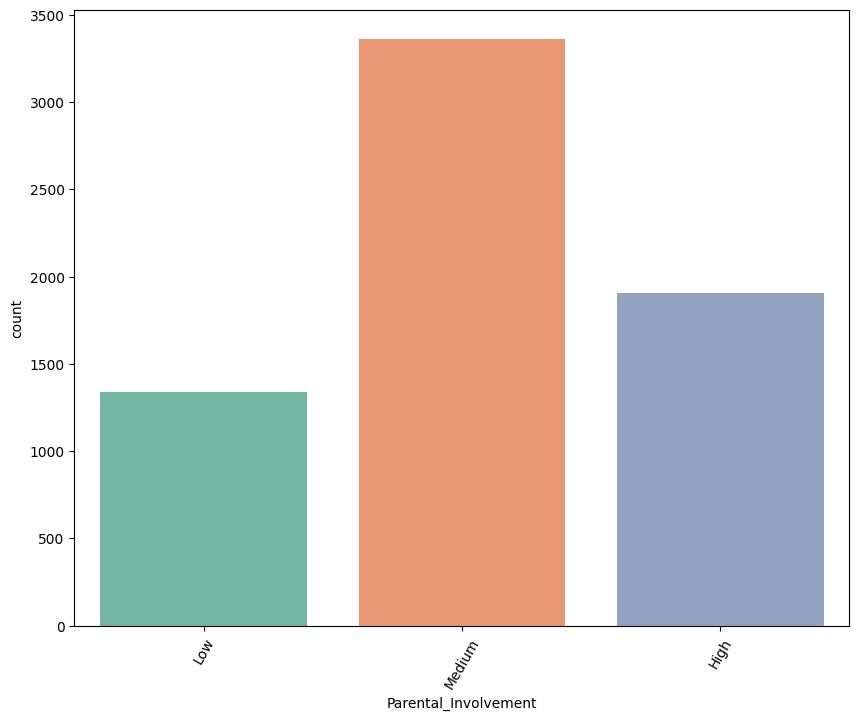

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Parental_Involvement',palette='Set2')
plt.xticks(rotation=60)
plt.show()

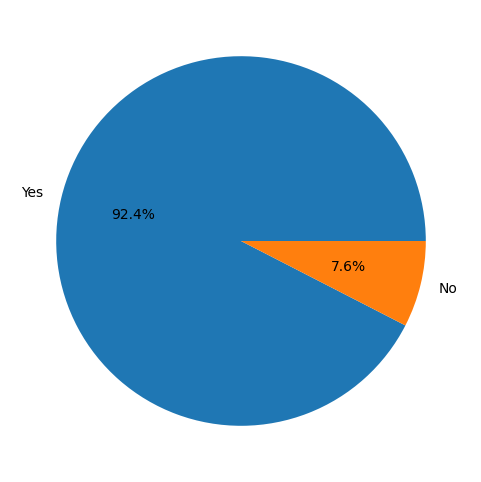

In [19]:
plt.figure(figsize=(6,6))
plt.pie(df['Internet_Access'].value_counts(), labels=df['Internet_Access'].value_counts().index, autopct='%1.1f%%')
plt.show()

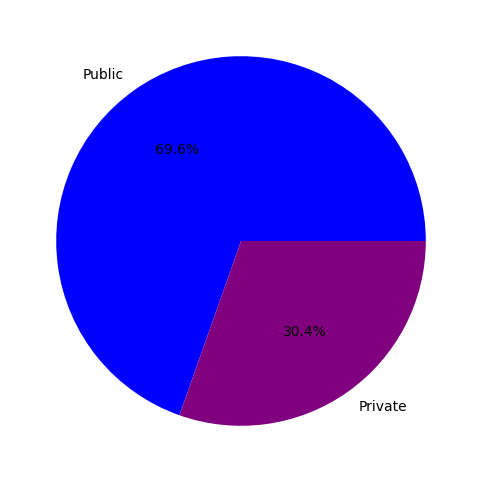

In [20]:
plt.figure(figsize=(6,6))
plt.pie(df['School_Type'].value_counts(), labels=df['School_Type'].value_counts().index, autopct='%1.1f%%',colors={'Purple','Blue'})
plt.show()

### **Bivariate Analysis**

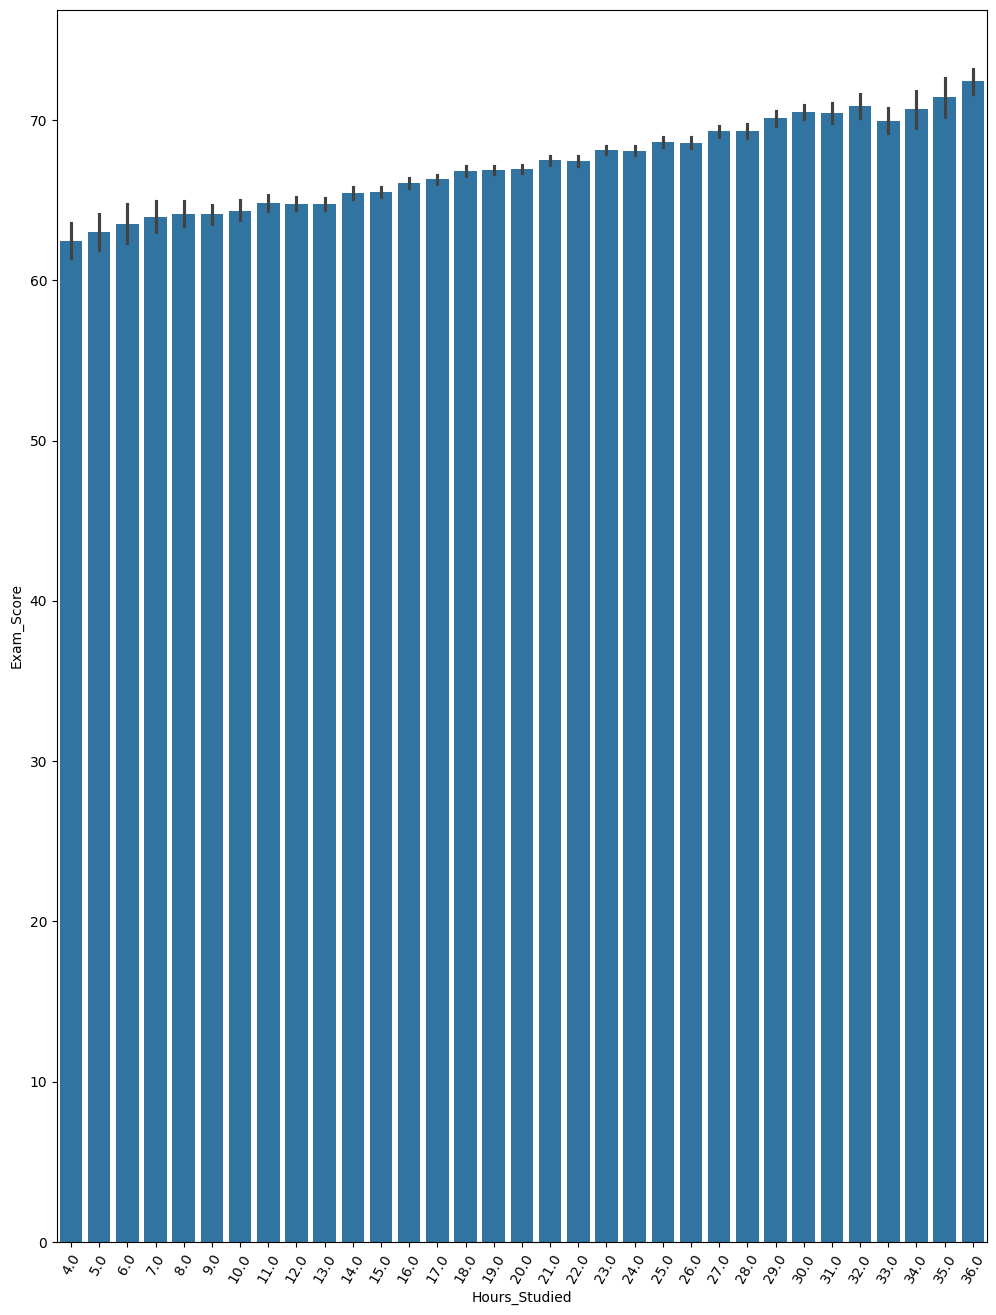

In [21]:
plt.figure(figsize=(12,16))
sns.barplot(data=df,x='Hours_Studied',y='Exam_Score')
plt.xticks(rotation=60)
plt.show()

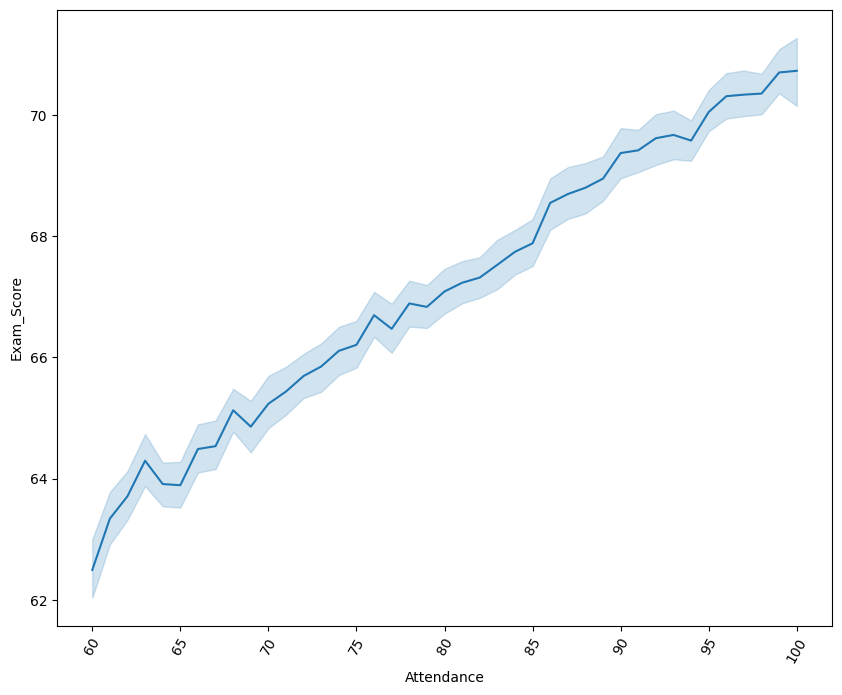

In [22]:
plt.figure(figsize=(10,8))
# Change 'Attendence' to 'Attendance'
sns.lineplot(data=df,x='Attendance',y='Exam_Score')
plt.xticks(rotation=60)
plt.show()

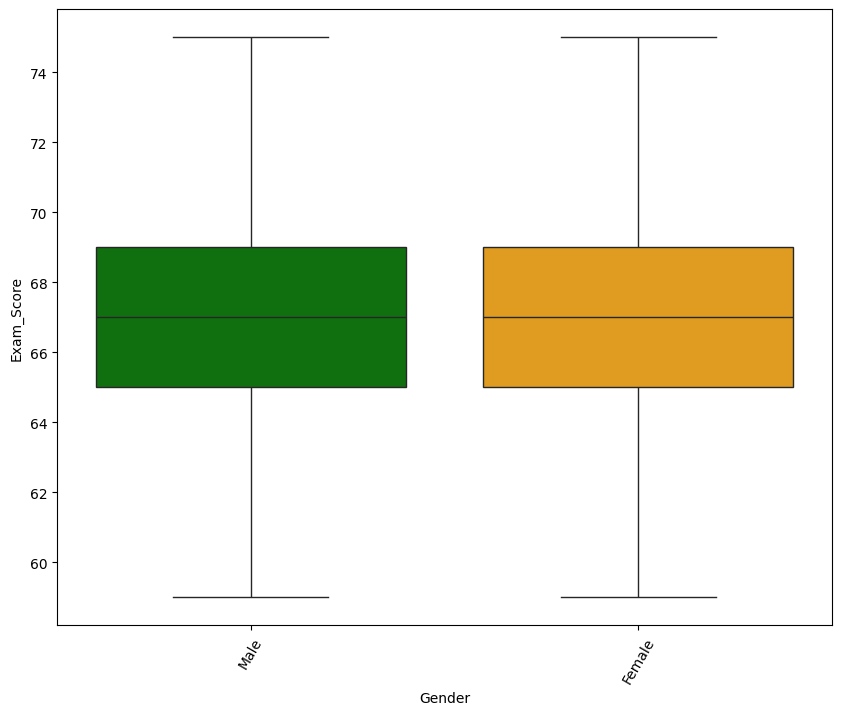

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Gender',y='Exam_Score',palette={'Male':'green','Female':'Orange'})
plt.xticks(rotation=60)
plt.show()

### **Multivariate Analysis**

<Figure size 1000x1200 with 0 Axes>

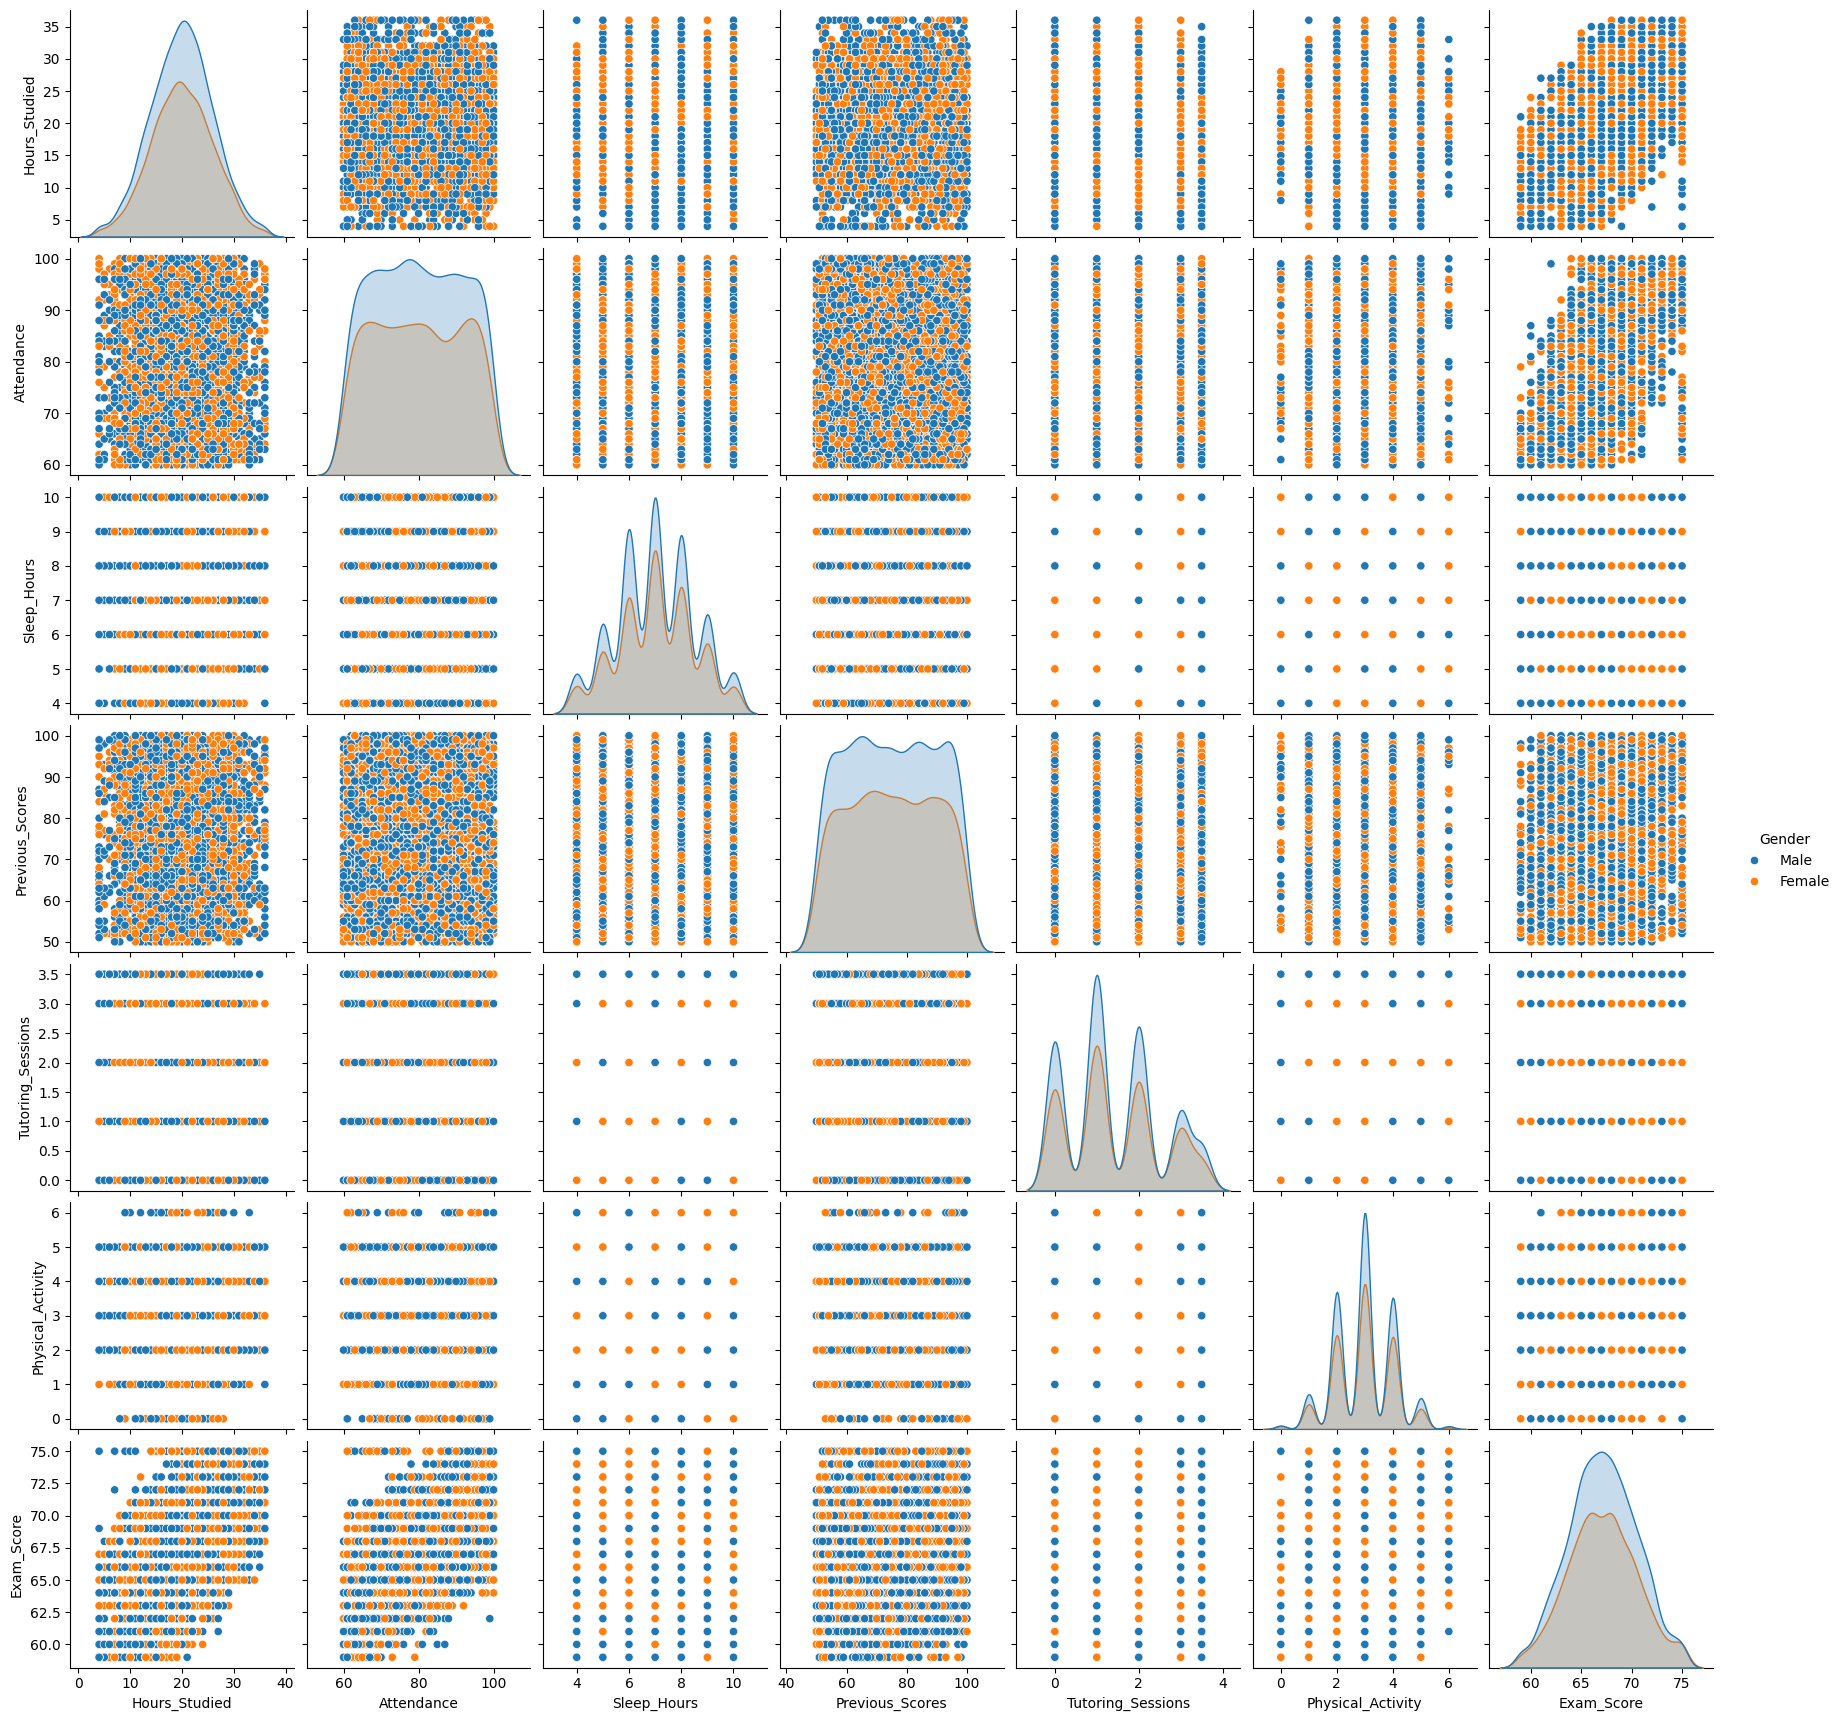

In [24]:
plt.figure(figsize=(10,12))
sns.pairplot(df,hue='Gender')
plt.show()

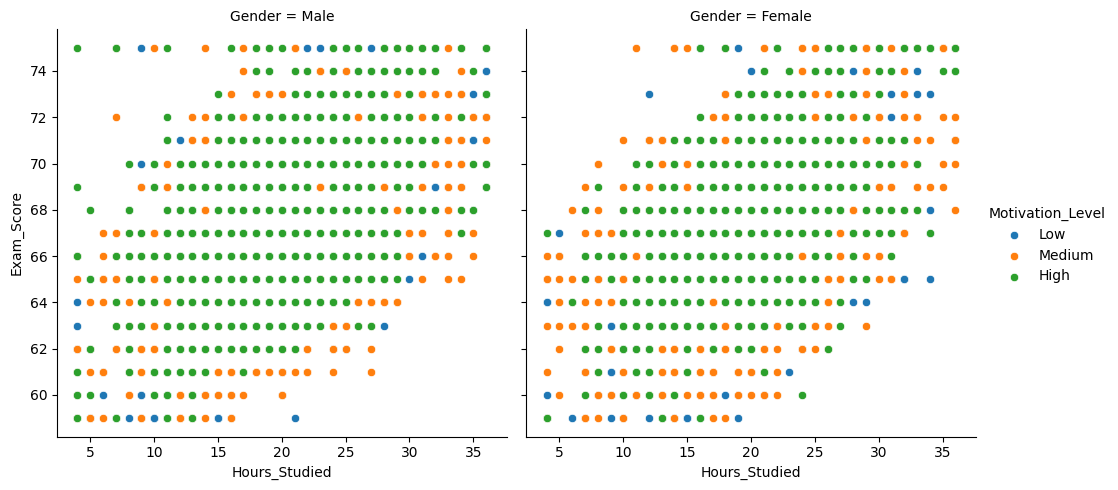

In [25]:
g = sns.FacetGrid(df, col="Gender", hue="Motivation_Level", height=5)
g.map(sns.scatterplot, "Hours_Studied", "Exam_Score")
g.add_legend()
plt.show()

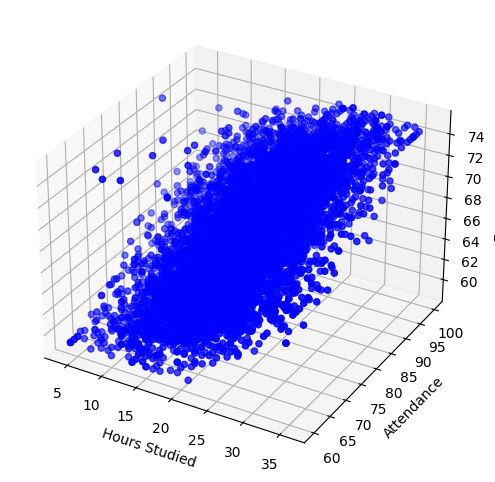

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for Hours_Studied, Attendance, and Exam_Score
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Hours_Studied'], df['Attendance'], df['Exam_Score'], c='blue', marker='o')

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Attendance')
ax.set_zlabel('Exam Score')

plt.show()

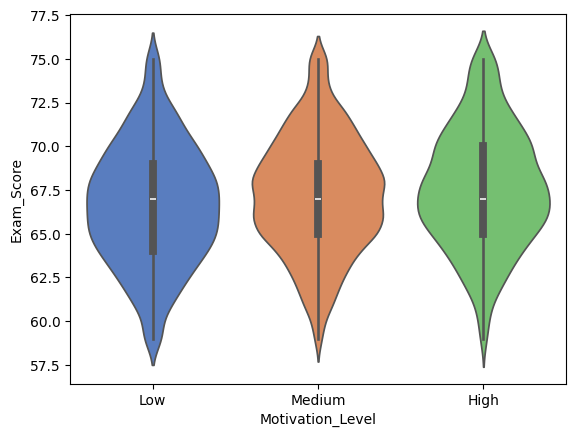

In [27]:
# Violin plot of Exam_Score by Motivation_Level
sns.violinplot(x='Motivation_Level', y='Exam_Score', data=df, palette='muted')
plt.show()


### **Label Encoding**

In [68]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                       'Parental_Education_Level', 'Distance_from_Home', 'Gender']

# Apply label encoding to each of the categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the encoded dataset
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,1,0,0,7,73,1,1,0.0,1,2,1,2,3,0,1,2,1,67.0
1,19.0,64,1,2,0,8,59,1,1,2.0,2,2,1,0,4,0,0,1,0,61.0
2,24.0,98,2,2,1,7,91,2,1,2.0,2,2,1,1,4,0,2,2,1,74.0
3,29.0,89,1,2,1,8,98,2,1,1.0,2,2,1,0,4,0,1,1,1,71.0
4,19.0,92,2,2,1,6,65,2,1,3.0,2,0,1,1,4,0,0,2,0,70.0


### **One-Hot-Encoding**

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # OneHotEncoder object
# encoder = OneHotEncoder(drop='first', sparse=False)

# # Apply the encoder on the categorical columns
# encoded_data = encoder.fit_transform(df[categorical_columns])

# # Create a new DataFrame for the encoded columns
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# # Drop the original categorical columns from the main DataFrame
# df.drop(categorical_columns, axis=1, inplace=True)

# # Concatenate the encoded columns with the original DataFrame
# df_encoded = pd.concat([df, encoded_df], axis=1)

# # Display the first few rows of the new DataFrame
# df_encoded.head()


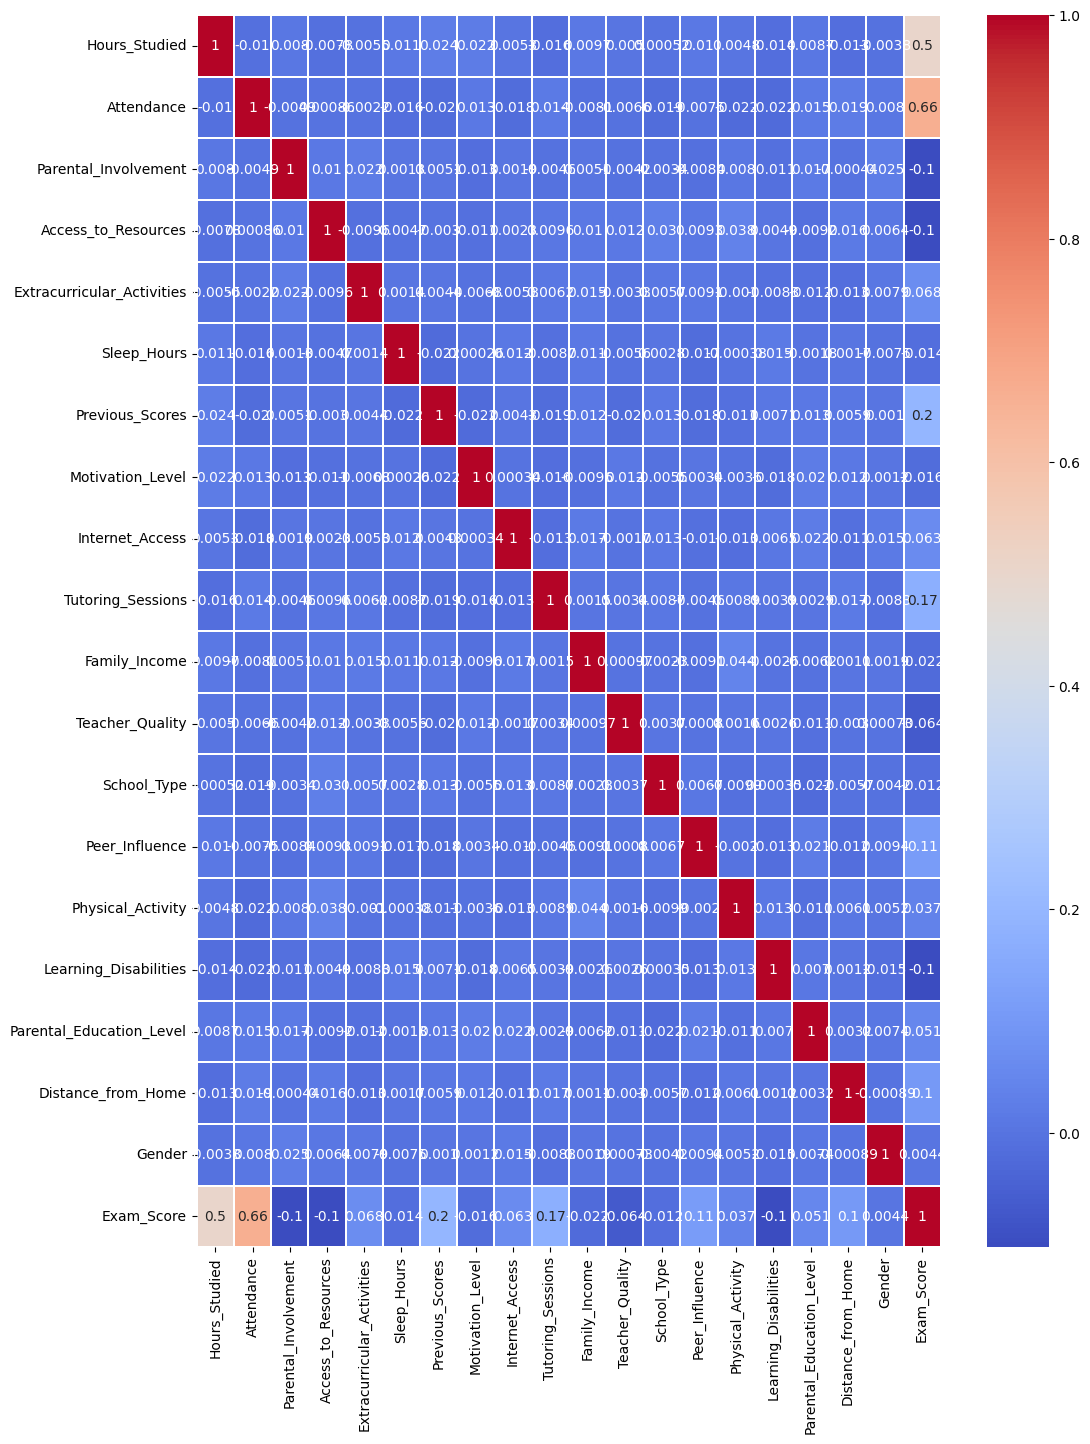

In [69]:
plt.figure(figsize=(12,16))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', linewidths=0.2)
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Exam_Score', axis=1))  # 'target_column' is the target you want to predict
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
x=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [73]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,1,0,0,7,73,1,1,0.0,1,2,1,2,3,0,1,2,1,67.0
1,19.0,64,1,2,0,8,59,1,1,2.0,2,2,1,0,4,0,0,1,0,61.0
2,24.0,98,2,2,1,7,91,2,1,2.0,2,2,1,1,4,0,2,2,1,74.0
3,29.0,89,1,2,1,8,98,2,1,1.0,2,2,1,0,4,0,1,1,1,71.0
4,19.0,92,2,2,1,6,65,2,1,3.0,2,0,1,1,4,0,0,2,0,70.0


In [59]:
# Import the RandomForestClassifier class from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Now you can instantiate the model correctly:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [60]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2_score_value = r2_score(y_test, y_pred)  # Store the result in a different variable

# Print the R-squared score
print(r2_score_value)

0.7319957017542582


In [61]:
mse_score=mean_squared_error(y_test,y_pred)
print(mse_score)

2.994452849218356


In [62]:
rmse_score=np.sqrt(mse_score)
print(rmse_score)

1.730448742152843


In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [75]:
r2_score_value = r2_score(y_test, y_pred)  # Store the result in a different variable

# Print the R-squared score
print(r2_score_value)

0.836821048741366


In [76]:
mse_score=mean_squared_error(y_test,y_pred)
print(mse_score)

1.8232232793551613


In [77]:
rmse_score=np.sqrt(mse_score)
print(rmse_score)

1.3502678546700138


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler for normalization
pipeline = Pipeline([('scaler', StandardScaler()), ('lr', lr)])

# Define the parameter grid for GridSearchCV, including parameters for the scaler and the model
param_grid = {
    'scaler__with_mean': [True, False],  # Control centering in StandardScaler
    'scaler__with_std': [True, False],   # Control scaling in StandardScaler
    'lr__fit_intercept': [True, False]  # Parameter for LinearRegression
}

# Create and fit GridSearchCV with the pipeline
cv = GridSearchCV(estimator=pipeline, param_grid=param_grid)
cv.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__fit_intercept': [True, False],
                         'scaler__with_mean': [True, False],
                         'scaler__with_std': [True, False]})

In [81]:
y_pred=cv.predict(x_test)
r2_score_value = r2_score(y_test, y_pred)  # Store the result in a different variable

# Print the R-squared score
print(r2_score_value)

0.8368210487413656


In [82]:
mse_score=mean_squared_error(y_test,y_pred)
print(mse_score)

1.823223279355164


In [83]:
rmse=np.sqrt(mse_score)
print(rmse)

1.3502678546700146


In [84]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,1,0,0,7,73,1,1,0.0,1,2,1,2,3,0,1,2,1,67.0
1,19.0,64,1,2,0,8,59,1,1,2.0,2,2,1,0,4,0,0,1,0,61.0
2,24.0,98,2,2,1,7,91,2,1,2.0,2,2,1,1,4,0,2,2,1,74.0
3,29.0,89,1,2,1,8,98,2,1,1.0,2,2,1,0,4,0,1,1,1,71.0
4,19.0,92,2,2,1,6,65,2,1,3.0,2,0,1,1,4,0,0,2,0,70.0


In [87]:
import numpy as np # Import numpy if not already imported

#dummy data
data=['25','84','1','0','0',7,73,'1','1',0,'1','2','1','2',3,'0','1','2','1']
# Reshape data to a 2D array with one row and multiple columns
data = np.array(data).reshape(1, -1)
# Convert elements to numeric type if needed
data = data.astype(float)
Exam_Score=cv.predict(data)
Exam_Score

array([69.53636311])